In [17]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('167-Countries-Data.csv')
df.info()
df.drop(columns=['Country'], inplace=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  167 non-null    int64  
 1   Country     167 non-null    object 
 2   Child_Mort  167 non-null    float64
 3   Exports     167 non-null    float64
 4   Health      167 non-null    float64
 5   Imports     167 non-null    float64
 6   Income      167 non-null    int64  
 7   Inflation   167 non-null    float64
 8   Life_Expec  167 non-null    float64
 9   Total_Fer   167 non-null    float64
 10  GDDP        167 non-null    int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 14.5+ KB


,Unnamed: 0,Child_Mort,Exports,Health,Imports,Income,Inflation,Life_Expec,Total_Fer,GDDP
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [16]:
values = Normalizer().fit_transform(df.values) 
print(values)

[[0.00000000e+00 5.28625544e-02 5.86059362e-03 ... 3.29365361e-02
  3.41086549e-03 3.24090827e-01]
 [9.31120048e-05 1.54565928e-03 2.60713613e-03 ... 7.10444597e-03
  1.53634808e-04 3.80828100e-01]
 [1.46524689e-04 2.00006201e-03 2.81327403e-03 ... 5.60456936e-03
  2.11728176e-04 3.26750057e-01]
 ...
 [3.50280283e-02 4.97654305e-03 1.53781588e-02 ... 1.56131029e-02
  4.16491800e-04 2.79797056e-01]
 [3.53195674e-02 1.20514645e-02 6.42173953e-03 ... 1.44489139e-02
  9.99650787e-04 2.80415959e-01]
 [4.61650209e-02 2.31103207e-02 1.02897938e-02 ... 1.44613318e-02
  1.50175369e-03 4.06029702e-01]]


In [18]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [19]:
for i in range(3, 11):
    s, dbs, calinski = clustering_algorithm(i, values)
    print(i, s, dbs, calinski)

3 0.5003063197051555 0.6511479506810843 417.9394141267293
4 0.4437297481488421 0.7925425084569246 385.7955420636326
5 0.4744695017438928 0.7236043507085339 380.82587719488373
6 0.45362142688190044 0.7690512872877951 395.09383672378385
7 0.44386617820353425 0.7363966080047746 399.26777777138096
8 0.41112668070539865 0.7278774466023242 394.995190302052
9 0.4101929610065311 0.6466683464911467 390.4616228260054
10 0.39151528178304434 0.8302425426870542 384.2162389672029


In [20]:
random_data = np.random.rand(167,9)
s_random, dbs_random, calinski_random = clustering_algorithm(3, random_data)
s, dbs, calinski = clustering_algorithm(3, values)

print(s_random, dbs_random, calinski_random)
print(s, dbs, calinski)

0.0976959580198848 2.487171242355491 18.677863833626958
0.5003063197051555 0.6511479506810843 417.9394141267293


In [21]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(3, set1)
s2, dbs2, calinski2 = clustering_algorithm(3, set2)
s3, dbs3, calinski3 = clustering_algorithm(3, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.506757272758222 0.6246770348774934 160.06266260643585
0.5209198549181707 0.6122222665591214 168.5453918380952
0.539782198405223 0.5707639638977168 126.83335842388271


In [22]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)
labels = kmeans.labels_

df['labels'] = labels
centroids = kmeans.cluster_centers_
print(centroids)

[[2.77421063e-02 2.63970831e-02 8.01967288e-03 2.13523223e-03
  1.39658781e-02 9.30551905e-01 2.92353798e-03 1.95564223e-02
  1.47750915e-03 3.55790328e-01]
 [5.48113915e-03 1.89866485e-03 1.41117957e-03 5.18448662e-04
  2.90791000e-03 6.78695095e-01 3.45396082e-04 3.63760540e-03
  1.78729883e-04 7.29290901e-01]
 [8.65449009e-03 1.07122842e-02 5.19932833e-03 9.01664763e-04
  7.27922236e-03 8.63131966e-01 1.23729337e-03 9.05862129e-03
  6.07993444e-04 4.99892452e-01]]


In [23]:
df_0 = df[df['labels'] == 0]
df_1 = df[df['labels'] == 1]
df_2 = df[df['labels'] == 2]

<function matplotlib.pyplot.show(close=None, block=None)>

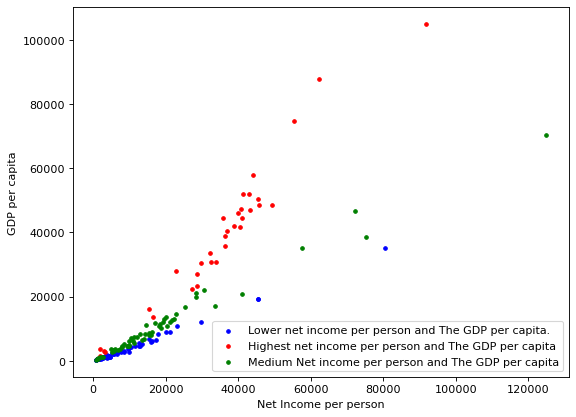

In [24]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(df_0['Income'], df_0['GDDP'], c='blue', s=10, label='Lower net income per person and The GDP per capita.')
plt.scatter(df_1['Income'], df_1['GDDP'], c='red', s=10, label='Highest net income per person and The GDP per capita')
plt.scatter(df_2['Income'], df_2['GDDP'], c='green', s=10, label='Medium Net income per person and The GDP per capita')

plt.xlabel('Net Income per person')
plt.ylabel('GDP per capita')
plt.legend(),
plt.show

In [25]:
def elbow_method(X):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, n_init=10, max_iter=300)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

In [26]:
def silhouette_method(X):
    silhouette_scores = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i, n_init=10, max_iter=300)
        kmeans.fit(X)
        labels = kmeans.predict(X)
        silhouette_scores.append(metrics.silhouette_score(X, labels, metric='euclidean'))
    plt.plot(range(2, 11), silhouette_scores)
    plt.title('Silhouette Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

C:\Users\MAHIMA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


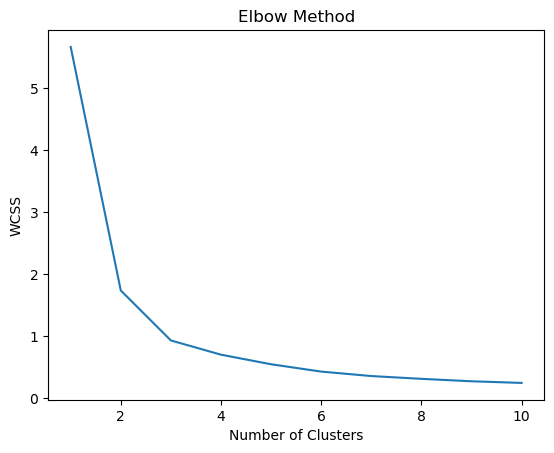

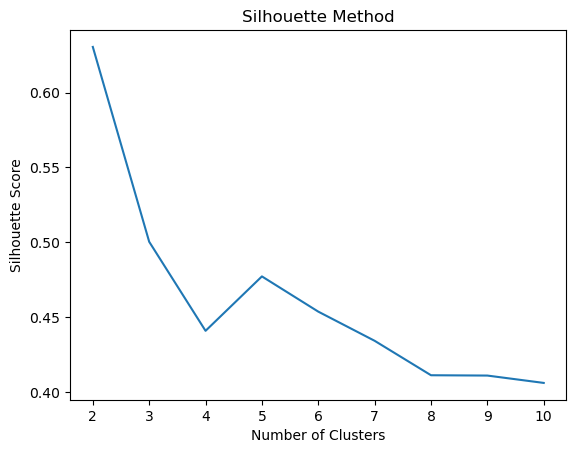

In [21]:
elbow_method(values)
silhouette_method(values)

In [22]:
nf = [[7,4.8,19.8,8.73,20.9,41400,1.16,82.0,1.93,51900]]
custom_point = np.array(nf)
cluster = kmeans.predict(custom_point.reshape(1, -1))[0]
print("The given data belongs to class - ",cluster)

The given data belongs to class -  1


In [23]:
nf = [[22,19.8,10.7,9.01,11.8,14500,8.41,74.2,1.8,11200]]
custom_point = np.array(nf)
cluster = kmeans.predict(custom_point.reshape(1, -1))[0]
print("The given data belongs to class - ",cluster)

The given data belongs to class -  2


In [24]:
nf = [[69,58.8,22.6,4.05,27.1,4410,8.98,66.2,2.6,135]]
custom_point = np.array(nf)
cluster = kmeans.predict(custom_point.reshape(1, -1))[0]
print("The given data belongs to class - ",cluster)

The given data belongs to class -  0
